# TP7 : Classification d'Images avec CNN et cifar10

**Brahim ALAOUI**

**Master : BIBDA**


 Appliquer le modèle CNN  sur la dataset CIFAR-10.
* Elle contient 60 000 images en couleur de 32x32 pixels
* Réparties en 10 classes (avions, voitures, oiseaux, chats, etc.).
* A importer en utilisant : 
from tensorflow.keras.datasets import cifar10


## PARTIE 1 

In [5]:
# Importe les librairies necessaires
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# Chargement des données CIFAR-10, qui contient des images de chiffres manuscrits
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


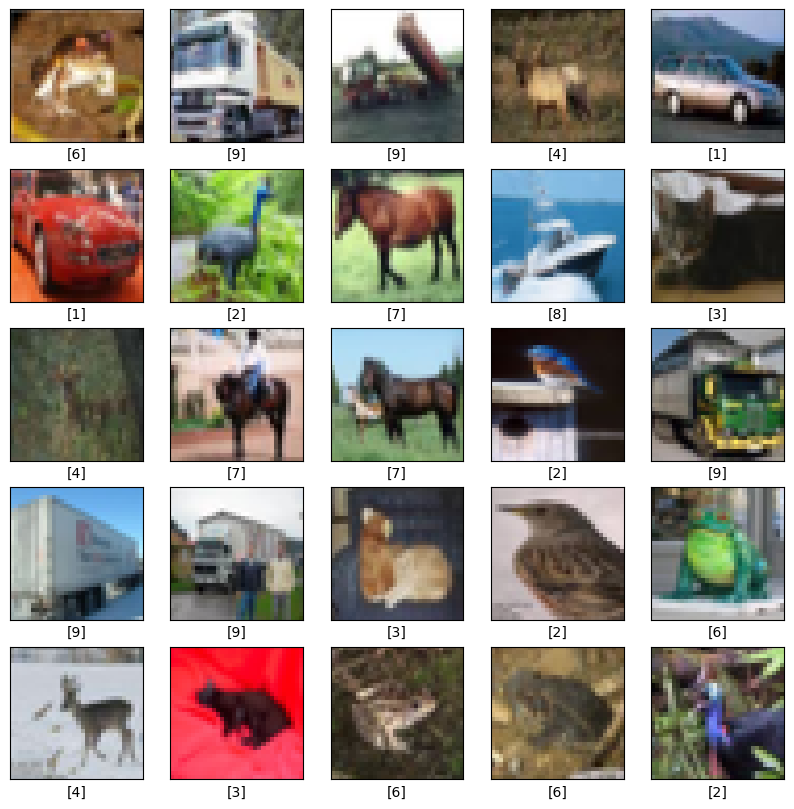

In [7]:
# Visualisation de quelques images de l'ensemble d'entraînement
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1) # Création d'un sous plot
    plt.xticks([])  # Cache les graduations des axes x (28px)
    plt.yticks([])  # Cache les graduations des axes y (28px)
    plt.imshow(x_train[i])  # Affiche l'image
    plt.xlabel(y_train[i])  # Affiche l'étiquette en dessous de chaque image
plt.show()

## PARTIE 2

Normalisation des images pour que chaque pixel soit entre 0 et 1
Cela aide le modèle à converger plus rapidement

In [10]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Reshape des données pour les adapter à l'entrée du CNN

Les images de 28x28 pixels sont transformées en 28x28x1 pour indiquer qu'elles ont une seule couche de couleur (grayscale)

In [12]:
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

## PARTIE 3

Construction du modèle CNN avec une séquence de couches

In [15]:
model = Sequential([
    # Première couche de convolution avec 32 filtres de taille 3x3 et activation ReLU
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # Première couche de pooling pour réduire la taille de l'image de moitié
    MaxPooling2D((2, 2)),
    # Deuxième couche de convolution avec 64 filtres de taille 3x3 et activation ReLU
    Conv2D(64, (3, 3), activation='relu'),
    # Deuxième couche de pooling pour réduire encore la taille de l'image de moitié
    MaxPooling2D((2, 2)),
    # Couche de flattening pour convertir les matrices 2D en vecteurs 1D
    Flatten(),
    # Couche dense entièrement connectée avec 64 neurones et activation ReLU
    Dense(64, activation='relu'),
    # Couche de sortie avec 10 neurones (pour les 10 classes de chiffres) et activation softmax
    Dense(10, activation='softmax')
])


C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilation du modèle avec l'optimiseur Adam et la fonction de perte sparse_categorical_crossentropy

La métrique d'évaluation est la précision

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## PARTIE 4

Entraînement du modèle avec les données d'entraînement

20 époques, avec validation sur les données de test

In [36]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9622 - loss: 0.1047 - val_accuracy: 0.6581 - val_loss: 2.8212
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9668 - loss: 0.0947 - val_accuracy: 0.6631 - val_loss: 2.8169
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9688 - loss: 0.0904 - val_accuracy: 0.6668 - val_loss: 2.8981
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9644 - loss: 0.0994 - val_accuracy: 0.6621 - val_loss: 2.9748
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9683 - loss: 0.0898 - val_accuracy: 0.6634 - val_loss: 2.9446
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9723 - loss: 0.0803 - val_accuracy: 0.6605 - val_loss: 3.1034
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9692 - loss: 0.0891 - val_accuracy: 0.6641 - val_loss: 3.1676
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9712 -

## PARTIE 5

**Évaluation du modèle sur les données de test**
 * test_loss contient la perte sur les données de test
 * test_acc contient la précision sur les données de test


In [38]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Précision sur les données de test: {:.2f}%".format(test_acc * 100))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6613 - loss: 3.7718
Précision sur les données de test: 66.02%


## PARTIE 6 

**Visualisation des résultats d'entraînement**
 
Graphique de la précision de l'entraînement et de la validation au cours des époques

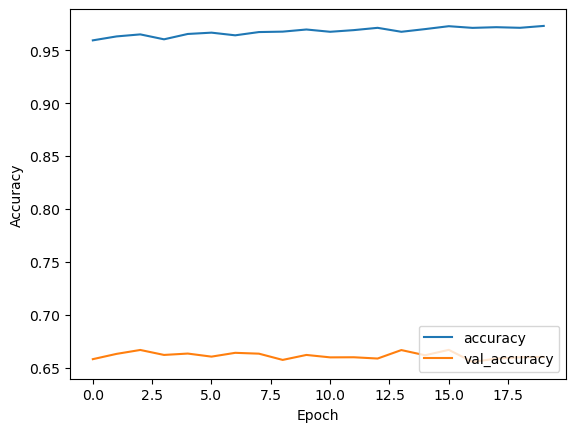

In [40]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

### MERCI